In [8]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parents[2] / "src" / "python"))
from paths import training_path, models_path

In [6]:
df = pd.read_csv(training_path / "vcf_feature_vectors.csv")

non_features = ["CHROM", "POS", "REF", "ALT", "GOLDEN"]
features = df.drop(columns=non_features)
target = df["GOLDEN"]

# Mutual Information

In [7]:
mi_scores = mutual_info_classif(features, target, discrete_features=False, random_state=42)
mi_df = pd.DataFrame({
    "Feature": features.columns,
    "MI_Score": mi_scores
}).sort_values(by="MI_Score", ascending=False)

print("\nTop Features by Mutual Information with GOLDEN:")
print(mi_df)


Top Features by Mutual Information with GOLDEN:
     Feature  MI_Score
11      TLOD  0.368504
13    AD_alt  0.313379
16  F1R2_alt  0.312532
18  F2R1_alt  0.308604
14        AF  0.301399
9      NALOD  0.284073
10      NLOD  0.284036
1       ECNT  0.218573
7    MMQ_alt  0.167048
3    MBQ_alt  0.152102
8       MPOS  0.130117
5   MFRL_alt  0.084761
12    AD_ref  0.064842
15  F1R2_ref  0.052039
17  F2R1_ref  0.049334
6    MMQ_ref  0.023721
2    MBQ_ref  0.013535
0         DP  0.012112
4   MFRL_ref  0.001554


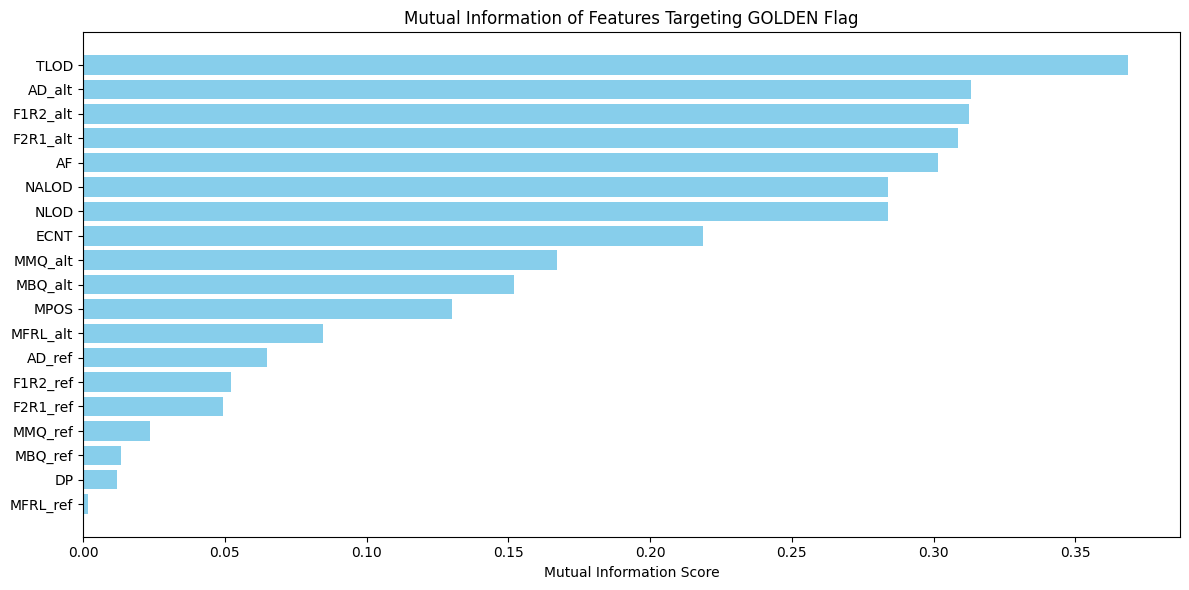

In [9]:
plt.figure(figsize=(12, 6))
plt.barh(mi_df["Feature"], mi_df["MI_Score"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Mutual Information of Features Targeting GOLDEN Flag")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()